In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [2]:
INPUT_PATH = '../../../Results/Workflow_Testing/Cluster_effect_exploring_PoC/'

df_LinearSVC = pd.read_csv(f'{INPUT_PATH}LinearSVC.csv')
df_SVC = pd.read_csv(f'{INPUT_PATH}SVC.csv')
df_RF = pd.read_csv(f'{INPUT_PATH}RF.csv')

INPUT_PATH_FULL = '../../../Results/Workflow_Testing/Full_effect_exploring_PoC/'

df_full = pd.read_csv(f'{INPUT_PATH_FULL}results.csv', index_col=0)

In [3]:
df_full

,Accuracy_mean,Jaccard_index_mean,Dice_coefficient_mean,Accuracy_std,Jaccard_index_std,Dice_coefficient_std,Time
Type,,,,,,,
LinearSVC,0.963534,0.792503,0.877488,0.013785,0.025447,0.017040,3012.226309
RF,0.964910,0.811834,0.890616,0.012966,0.022642,0.014824,3007.091517
SVC,0.966604,0.819344,0.895492,0.013378,0.029425,0.019152,255312.397241


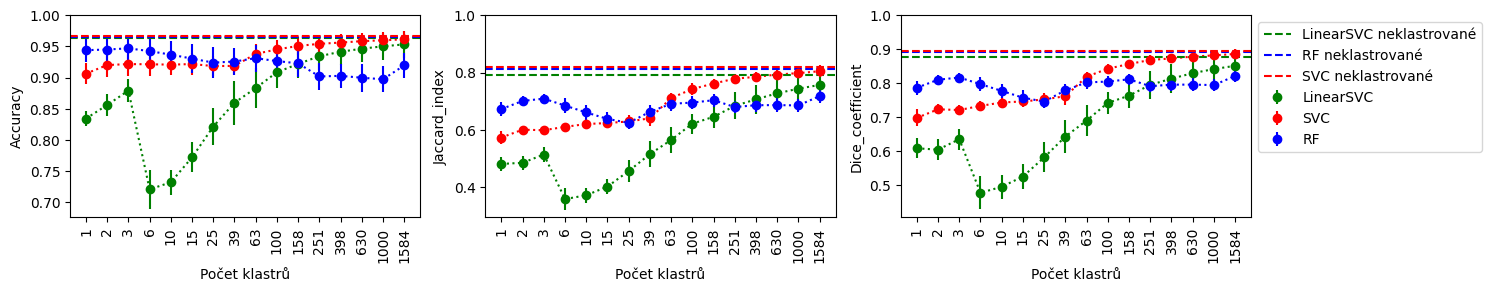

In [4]:
col_names = list(['Accuracy', 'Jaccard_index', 'Dice_coefficient'])
x = list(df_LinearSVC.index)

fig, axes = plt.subplots(nrows=1, ncols=len(col_names), figsize=(15, 3))

for i, column in enumerate(col_names):

    axes[i].plot(x, df_LinearSVC[f'{column}_mean'], color='green', linestyle=':')
    axes[i].errorbar(x, df_LinearSVC[f'{column}_mean'], yerr=df_LinearSVC[f'{column}_std'], fmt='o', color='green', label=f'LinearSVC')

    axes[i].plot(x, df_SVC[f'{column}_mean'], color='red', linestyle=':')
    axes[i].errorbar(x, df_SVC[f'{column}_mean'], yerr=df_SVC[f'{column}_std'], fmt='o', color='red', label=f'SVC')

    axes[i].plot(x, df_RF[f'{column}_mean'], color='blue', linestyle=':')
    axes[i].errorbar(x, df_RF[f'{column}_mean'], yerr=df_RF[f'{column}_std'], fmt='o', color='blue', label=f'RF')

    axes[i].set_xticks(list(df_LinearSVC.index))
    axes[i].set_xticklabels(list(df_LinearSVC['n_clusters'].values))
    axes[i].set_xlabel('Počet klastrů')
    axes[i].set_ylabel(f'{column}')
    axes[i].set_ylim(top=1)
    axes[i].tick_params(axis='x', rotation=90)

    axes[i].axhline(y=df_full.iloc[0,i], color='g', linestyle='--', label='LinearSVC neklastrované')
    axes[i].axhline(y=df_full.iloc[1,i], color='b', linestyle='--', label='RF neklastrované')
    axes[i].axhline(y=df_full.iloc[2,i], color='r', linestyle='--', label='SVC neklastrované')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(pad=1.0)
plt.savefig(f'{INPUT_PATH}metrics.png')
plt.show()

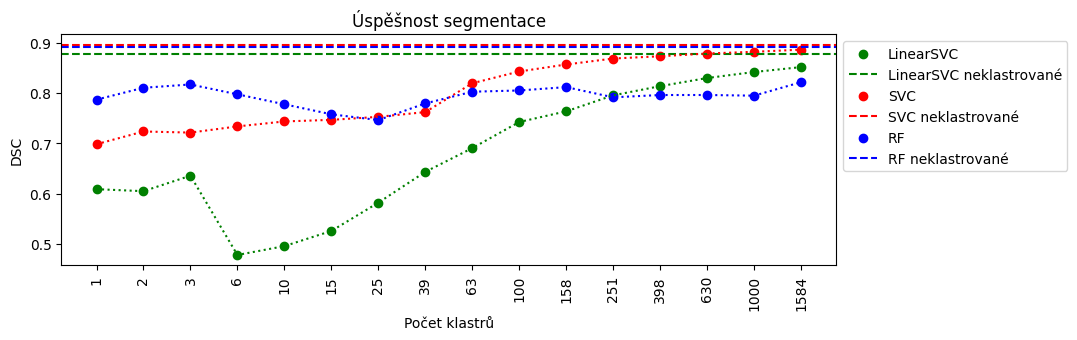

In [5]:
plt.figure(figsize=(10, 3))

# LinearSVC
plt.plot(df_LinearSVC[f'Dice_coefficient_mean'], color='green', linestyle=':')
plt.scatter(list(df_LinearSVC.index), df_LinearSVC[f'Dice_coefficient_mean'], marker='o', color='green', label='LinearSVC')

plt.axhline(y=df_full.loc['LinearSVC', 'Dice_coefficient_mean'], color='g', linestyle='--', label=f'LinearSVC neklastrované')

# SVC
plt.plot(df_SVC[f'Dice_coefficient_mean'], color='red', linestyle=':')
plt.scatter(list(df_SVC.index), df_SVC[f'Dice_coefficient_mean'], marker='o', color='red', label='SVC')

plt.axhline(y=df_full.loc['SVC', 'Dice_coefficient_mean'], color='r', linestyle='--', label=f'SVC neklastrované')

# RF
plt.plot(df_RF[f'Dice_coefficient_mean'], color='blue', linestyle=':')
plt.scatter(list(df_RF.index), df_RF[f'Dice_coefficient_mean'], marker='o', color='blue', label='RF')

plt.axhline(y=df_full.loc['RF', 'Dice_coefficient_mean'], color='b', linestyle='--', label=f'RF neklastrované')

# Settings
plt.title('Úspěšnost segmentace')
plt.xlabel('Počet klastrů')
plt.ylabel('DSC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(list(df_RF.index), labels=list(df_RF['n_clusters'].values))
plt.tick_params(axis='x', rotation=90)
plt.show()

In [6]:
max_LinearSVC = df_LinearSVC['Dice_coefficient_mean'].idxmax()
max_SVC = df_SVC['Dice_coefficient_mean'].idxmax()
max_RF = df_RF['Dice_coefficient_mean'].idxmax()

print(f"LinearSVC má maximální DSC: {df_LinearSVC.at[max_LinearSVC, 'Dice_coefficient_mean']:.3f} +- {df_LinearSVC.at[max_LinearSVC, 'Dice_coefficient_std']:.3f} a to pro {df_LinearSVC.at[max_LinearSVC, 'n_clusters']} klastrů.")
print(f"SVC má maximální DSC: {df_SVC.at[max_SVC, 'Dice_coefficient_mean']:.3f} +- {df_SVC.at[max_SVC, 'Dice_coefficient_std']:.3f} a to pro {df_SVC.at[max_SVC, 'n_clusters']} klastrů.")
print(f"RF má maximální DSC: {df_RF.at[max_RF, 'Dice_coefficient_mean']:.3f} +- {df_RF.at[max_RF, 'Dice_coefficient_std']:.3f} a to pro {df_RF.at[max_RF, 'n_clusters']} klastrů.")

LinearSVC má maximální DSC: 0.851 +- 0.042 a to pro 1584 klastrů.
SVC má maximální DSC: 0.886 +- 0.014 a to pro 1584 klastrů.
RF má maximální DSC: 0.821 +- 0.018 a to pro 1584 klastrů.


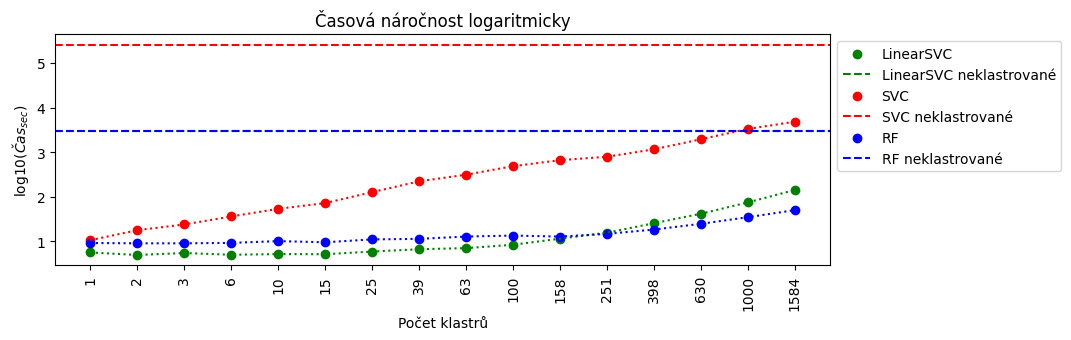

In [7]:
plt.figure(figsize=(10, 3))

# LinearSVC
plt.scatter(df_LinearSVC.index, np.log10(df_LinearSVC['Time']), color='green', label='LinearSVC')
plt.plot(df_LinearSVC.index, np.log10(df_LinearSVC['Time']), color='green', linestyle=':')

plt.axhline(y=np.log10(df_full.iloc[0,-1]), color='g', linestyle='--', label='LinearSVC neklastrované')

# SVC
plt.scatter(df_SVC.index, np.log10(df_SVC['Time']), color='red', label='SVC')
plt.plot(df_SVC.index, np.log10(df_SVC['Time']), color='red', linestyle=':')

plt.axhline(y=np.log10(df_full.iloc[2,-1]), color='r', linestyle='--', label='SVC neklastrované')

# RF
plt.scatter(df_SVC.index, np.log10(df_RF['Time']), color='blue', label='RF')
plt.plot(df_SVC.index, np.log10(df_RF['Time']), color='blue', linestyle=':')

plt.axhline(y=np.log10(df_full.iloc[1,-1]), color='b', linestyle='--', label='RF neklastrované')

# Settings
plt.title('Časová náročnost logaritmicky')
plt.xlabel('Počet klastrů')
plt.ylabel('log10($Čas_{sec}$)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(list(df_RF.index), labels=list(df_RF['n_clusters'].values))
plt.tick_params(axis='x', rotation=90)
plt.show()